In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_hist = pd.read_csv('data/hist_diamonds.csv')
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [4]:
df_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


In [29]:
df_hist.corr().price

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

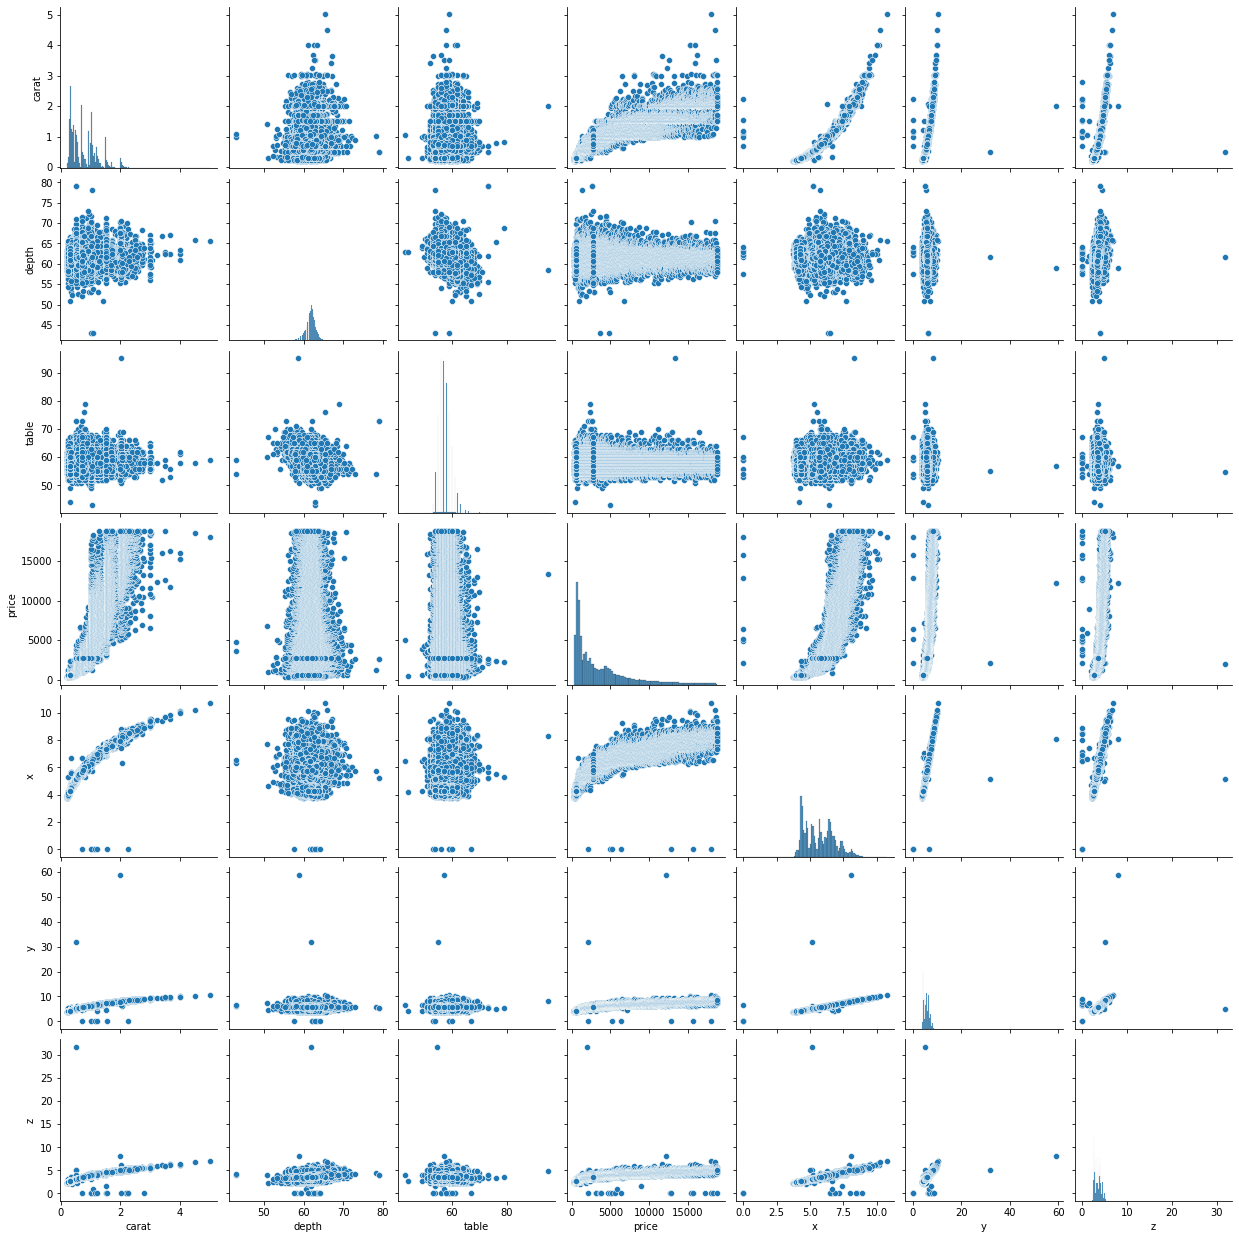

In [5]:
sns.pairplot(df_hist)

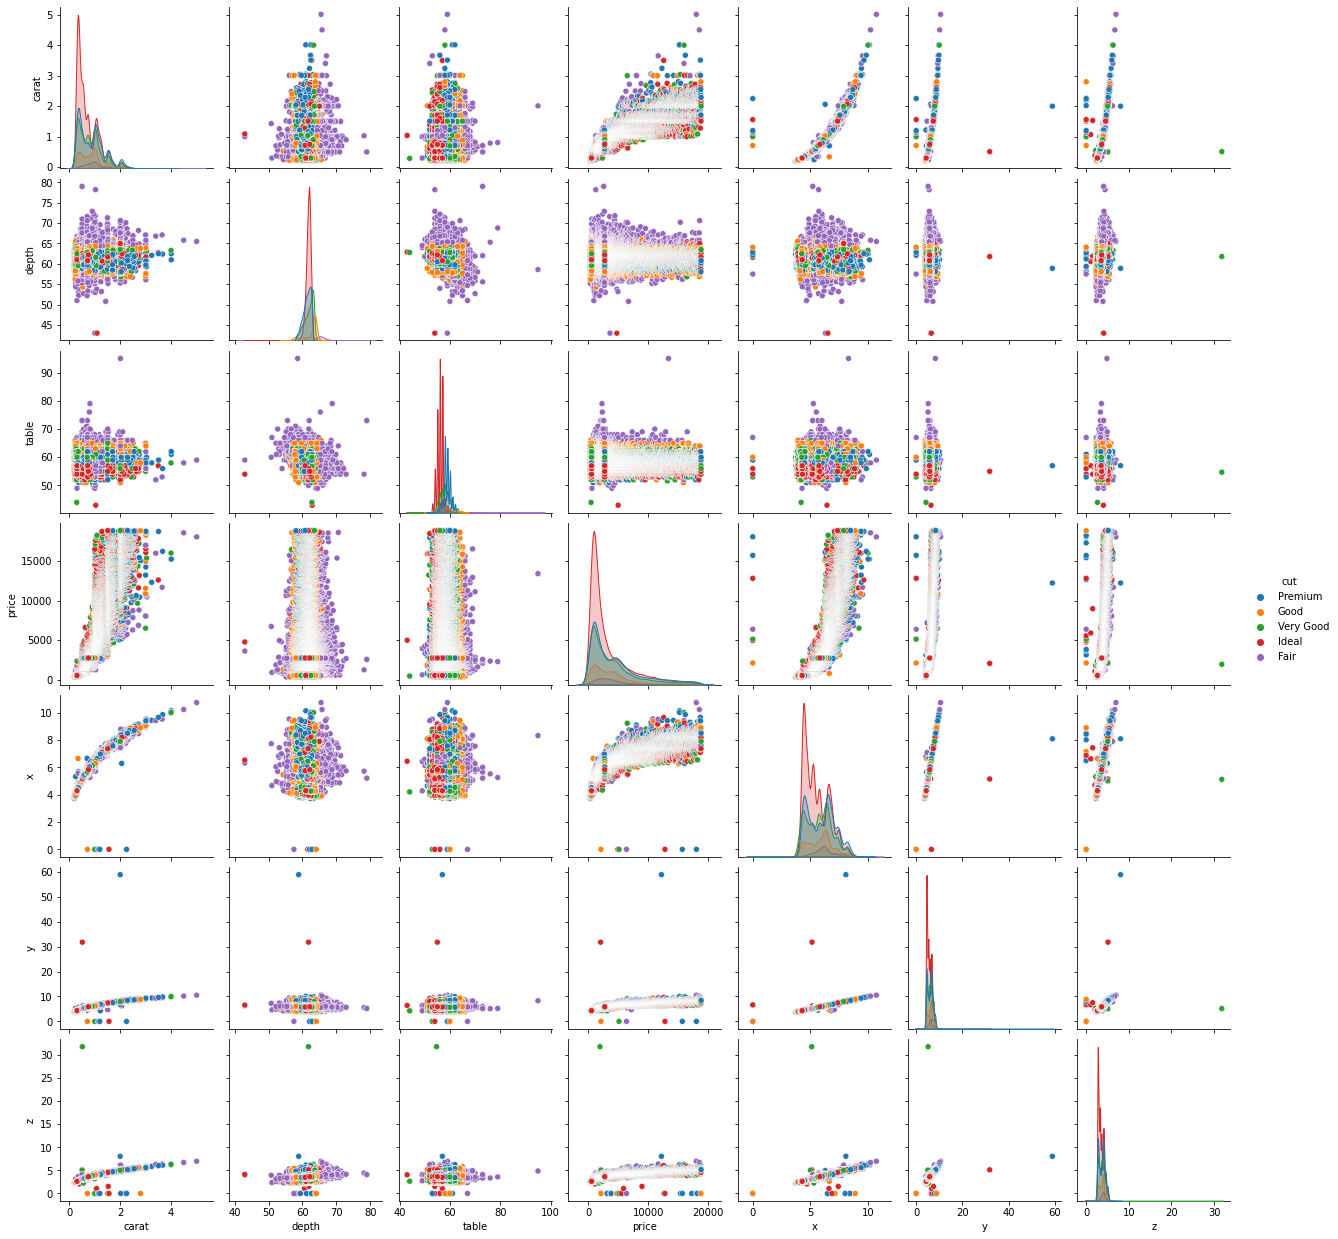

In [6]:
sns.pairplot(df_hist, hue='cut')

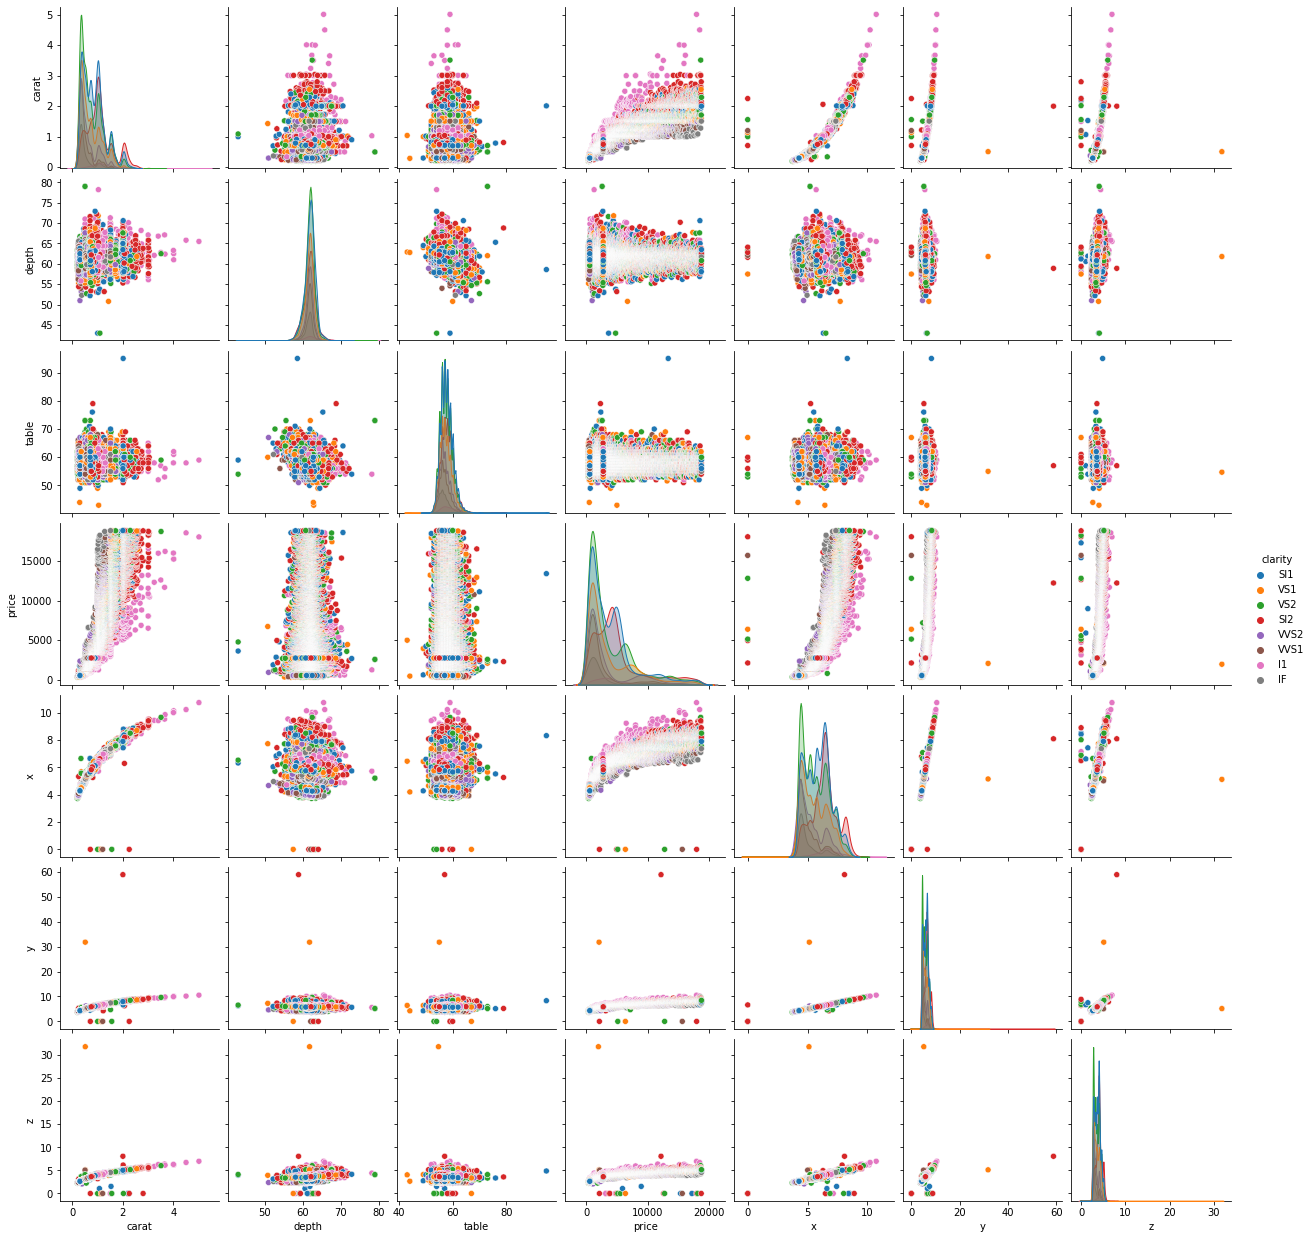

In [8]:
sns.pairplot(df_hist, hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

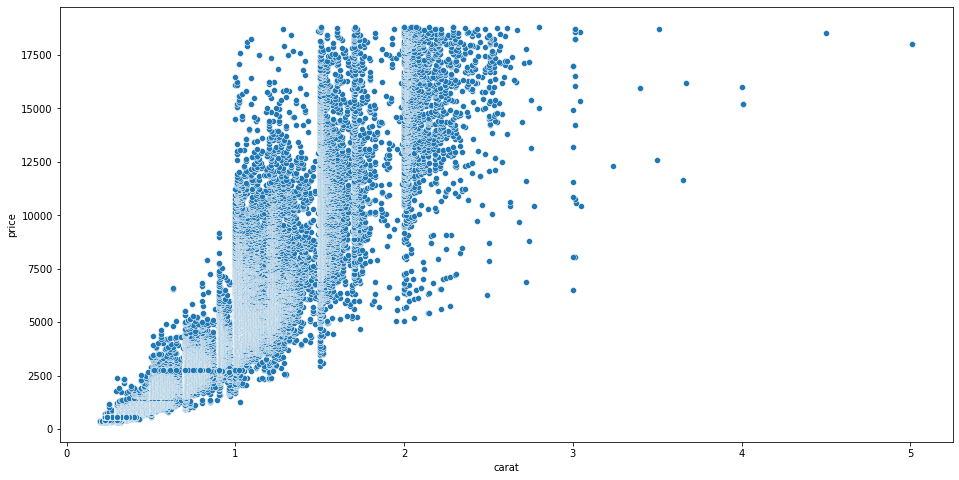

In [14]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price')

<AxesSubplot:xlabel='carat', ylabel='price'>

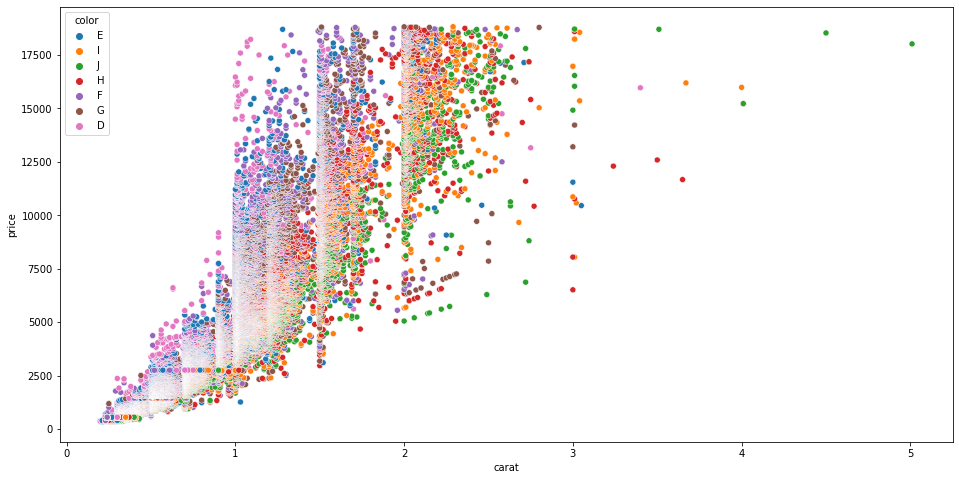

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='color')

<AxesSubplot:xlabel='carat', ylabel='price'>

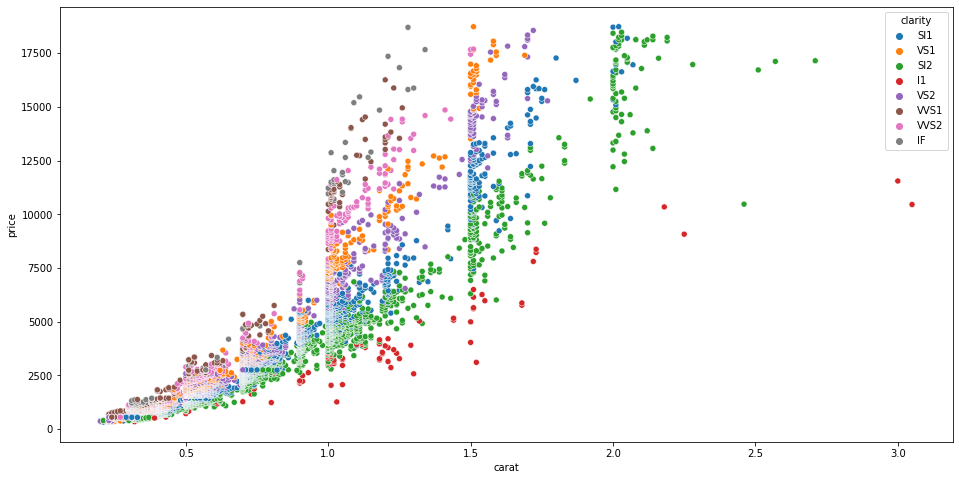

In [46]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['color']=='E'], x='carat', y='price', hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

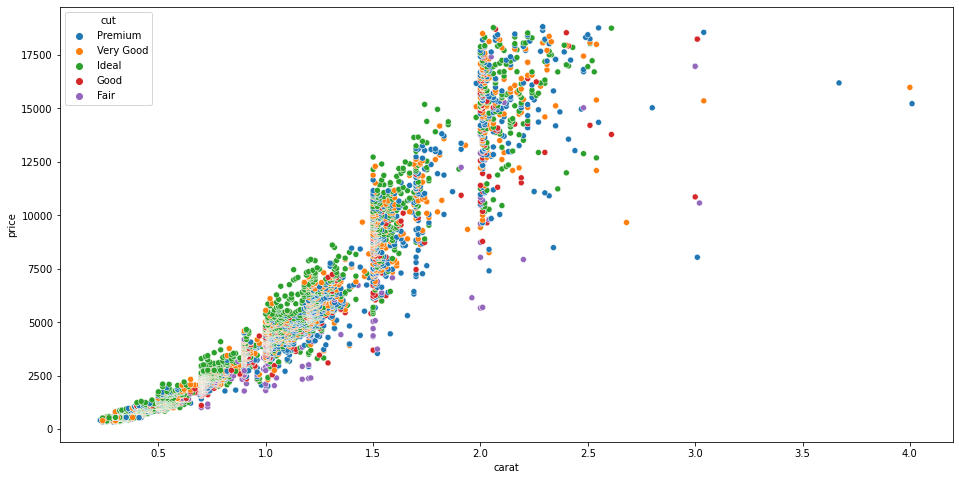

In [54]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['color']=='I'], x='carat', y='price', hue='cut')

---

<AxesSubplot:xlabel='carat', ylabel='price'>

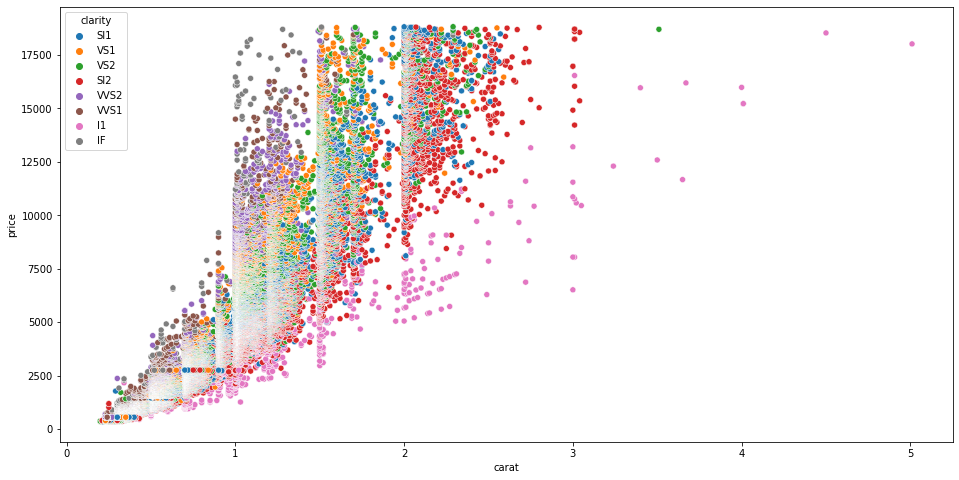

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

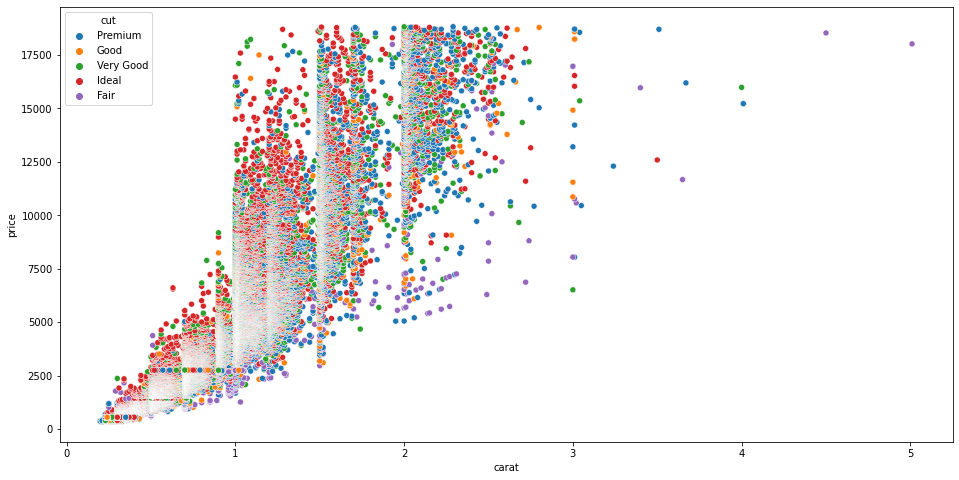

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='cut')

In [9]:
X = df_hist[['carat']] #feature - formato de dataframe
Y = df_hist['price'] #target - formato de série

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, Y)

LinearRegression()

In [19]:
model.coef_

array([7759.35277644])

In [21]:
model.intercept_

-2256.1316930741527

In [22]:
predict_price = model.predict(X)

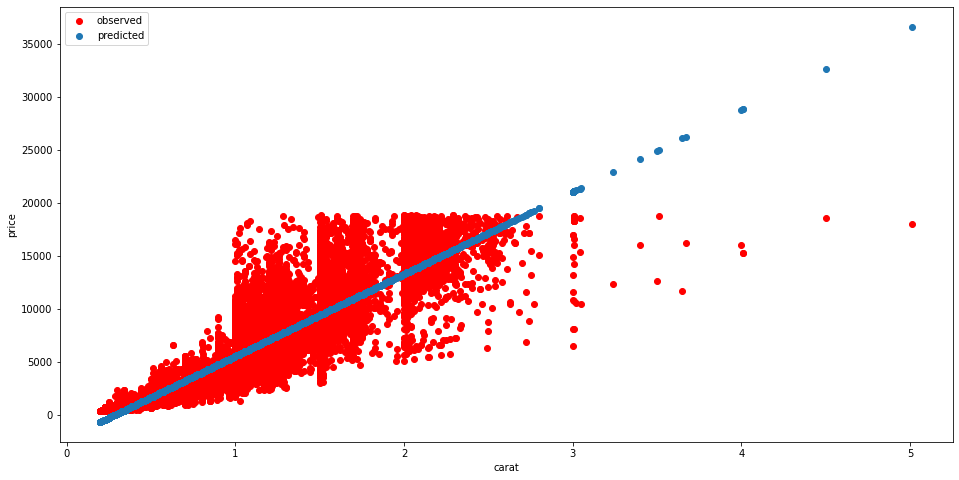

In [23]:
plt.figure(figsize=(16,8))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(X, Y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, predict_price, label='predicted')


plt.legend();

In [26]:
np.sqrt(mean_squared_error(Y, model.predict(X)))

1542.8464716474002